# Introduction au langage d'assemblage et à l'ARMLite

Le programme dont le début du listing figure ci-dessous est écrit dans un **langage d'assemblage** \[ *assembly language* \] - il doit probablement vous paraître peu familier!

Le langage d'assemblage est «**bas-niveau**», chaque instruction (ligne de code dans ce cas) réalise une opération élémentaire très simple, et il peut y avoir beaucoup d'instructions de ce genre pour réaliser la fonctionnalité d'une simple ligne de code d'un langage «**haut-niveau**» (comme Python, VB ou C#). 

       MOV R1, #.PixelScreen
       MOV R2, #screen2
       MOV R6, #0
       MOV R9, #.black
       MOV R10, #.white
       MOV R3, #0
     loopWhite: STR R10, [R2+R3]
       ADD R3, R3, #4
       CMP R3, #12288
       BLT loopWhite
       MOV R3, #260
     randLoop: LDR R0, .Random
       AND R0, R0, #1
       ...

<a href="jeu_de_la_vie.txt">le code complet</a>

Chaque **instruction** en langage d'assemblage correspond à une opération élémentaire qui peut être exécutée *directement par les circuits du processeur*. Différents processeurs ont donc différents langages d'assemblage bien qu'ils aient de nombreuses caractéristiques communes. Le langage d'assemblage montré ici est celui d'un processeur ARM 32-bit.

Un processeur ne peut pas exécuter *directement* le langage d'assemblage: chaque ligne de code doit être traduite en **code machine** au préalable - ce qu'on appelle l'*assemblage* et l'outil qui effectue la traduction s'appelle un *assembleur* - chaque instruction produira un *mot binaire de 32 bits*.

Afin de pouvoir expérimenter, nous allons utiliser un programme en ligne appelé ARMlite qui simule un ordinateur très simple construit sur la base d'un processeur ARM 32 bits simplifié.

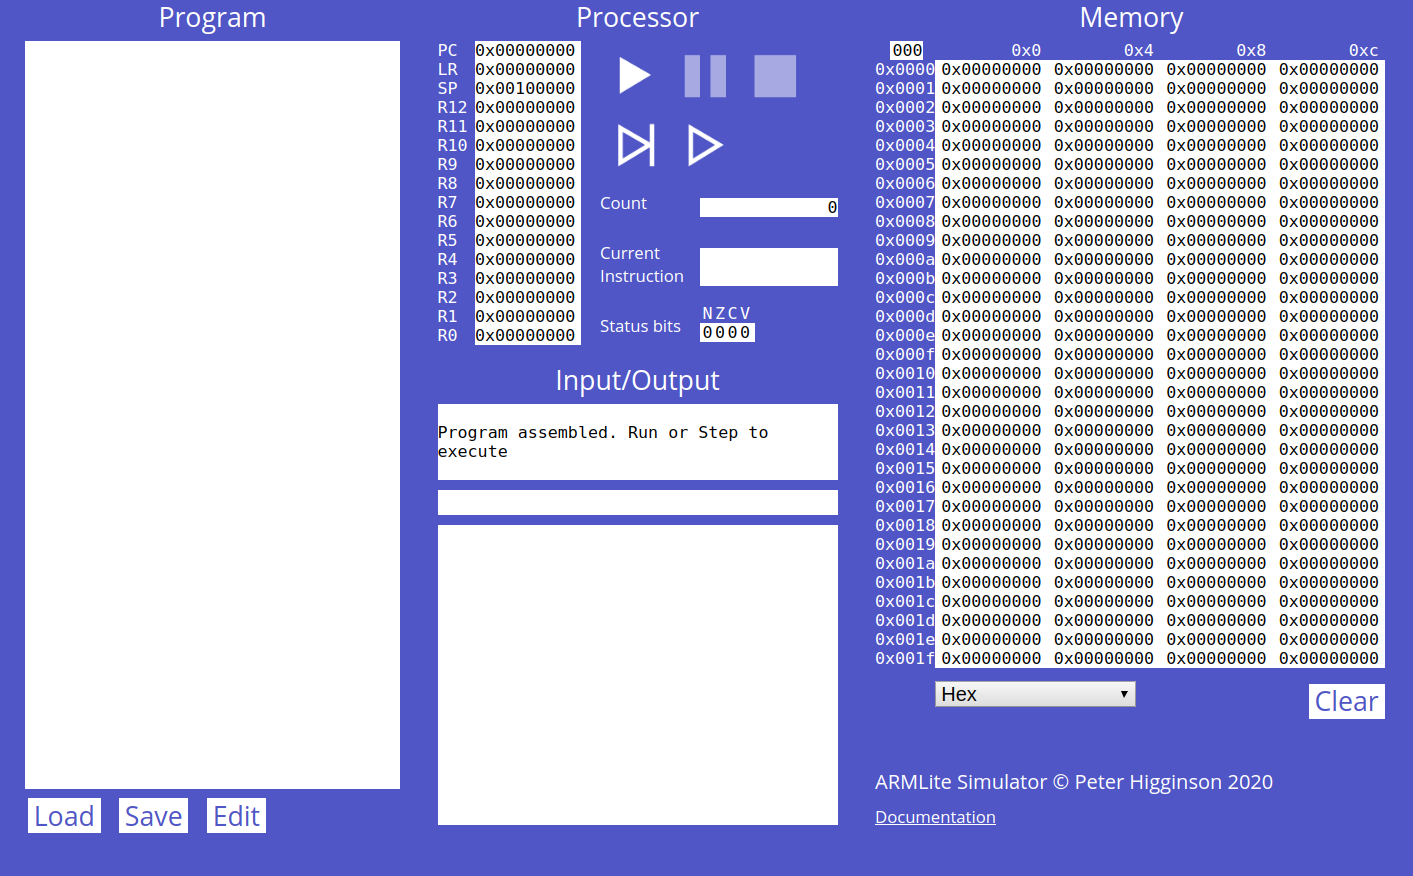

Vous pouvez voir que l'écran est divisé en quatre zones principales: le **programme**, le **processeur**, la **mémoire** et les **entrées/sorties** \[ *Input/Output* \]

La mémoire est formée de **mot** de 32 bits. Dans la vue précédente, chaque mot contient 0, ce qui est indiqué par l'écriture hexadécimale `0x00000000`. `0x` est le préfixe standard pour indiquer que ce qui suit est dans le format hexadécimal (hex). Chaque chiffre hexadécimal correspond à 4 bits donc il y a 8 chiffres pour représenter les 32 bits.

#### Exercice 1

Accèder au simulateur - [https://www.peterhigginson.co.uk/ARMlite/](https://www.peterhigginson.co.uk/ARMlite/) - en utilisant de préférence Chrome (pour une fois). La plupart des navigateurs modernes devraient fonctionner mais pas internet explorer.

Cliquer sur un mot mémoire quelconque et saisir `101` (suivi d'un appui sur la touche «Entrée»).

Quelle valeur est affichée et pourquoi?

Sur un autre mot mémoire, saisir `0x101`

Quelle valeur est affichée et pourquoi?

Sur un autre mot mémoire, saisir `0b101`

Quelle valeur est affichée et pourquoi?

Si vous survolez (ne pas cliquer) avec la souris un des mots de la mémoire saisi, vous obtenez une 'tooltip'. Que vous apprend-t-elle?

Le sélecteur 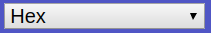 vous permet de changer la base dans laquelle les données sont affichées. Changer la base ne change pas la valeur sous-jacente.

Changer la base en **Decimal (unsigned)**. Faire une copie d'écran de la partie qui montre les trois mots mémoire saisis précédemment dans leur nouvelle forme.

Lorsque vous les survolez avec la souris, qu'indique la tooltip?

Est-ce que le changement de format de présentation des données en mémoire change aussi celui des entêtes de lignes et de colonnes (chiffre en blanc sur fond bleu).
____

## L'adressage

La mémoire est présentée en quatre colonnes seulement pour le confort visuel. Chaque mot mémoire est repéré par une unique **adresse** - un nombre hexadécimal à 5 chiffres. Les quatre premiers chiffres des adresses forment les entêtes de lignes, et l'adresse complète s'obtient en insérant à droite le chiffre hexadécimal montré dans l'entête de colonne. Ainsi, le premier mot mémoire a pour adresse `0x00000` et celui du mot le plus bas et à droite (voir figure précédente) est `0x001fc`.

#### Exercice 2

Quelle est l'adresse du mot mis en surbrillance ci-dessous:

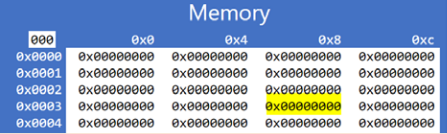

Puisque l'adresse a 5 chiffres hexadécimal, et que chaque chiffre correpond à 4 bits, quelle la valeur maximale de l'adresse en représentation hexadécimal? et en décimal?
___

Pourquoi l'adresse en colonnes avance-t-elle par saut de 4 (`0x0`, `0x4`, `0x8`, `0xc`)? Chaque mot de 32 bits est formé de quatre octets \[ *bytes* \] (8 bits). L'ARMlite, de même que la plupart des processeurs modernes utilise «l'adressage par octet» \[ *byte adressing* \] pour la mémoire. Lorsqu'on charge ou récupère un **mot** (ce que nous apprendrons à faire un peu plus tard), on précise seulement l'adresse du premier octet (parmi les quatre) du mot mémoire correspondant.

### Culture - Comment est formé un mot mémoire?

La taille d'un mot mémoire varie d'une machine à l'autre. Les ordinateurs modernes ont ordinairement des mot de 32 ou 64 bits; Sur d'autres, plus anciens, ils pouvaient être de 16, 8 ou 4 bits. Et avant l'émergence des processeurs sur une puce dans les années 70, les ordinateurs avaient des tailles de mots très variables: 18, 20, 36, 40, 60...

Mais depuis l'apparition des puces mémoires à base de semi-conducteur, les mémoires ont été mesurées et gérées en **octets** - qui vaut toujours 8 bits indépendamment de la taille du mot que la machine manipule en mémoire.
____

ARMLite, comme de nombreux ordinateurs modernes est un **ordinateur à programme enregistré** \[ *stored program computer* \]: la mémoire est utilisé *à la fois* pour enregistrer les instructions du programmes et ausi les données que manipule le programme. Pour faire fonctionner un programme en assembleur, il est nécessaire de traduire ses instructions en code machine mais aussi de charger en mémoire ce code machine.

Sur d'anciennes machines, il s'agissait de deux étapes distinctes; sur ARMLite, ces deux étapes sont effectuées en une seule fois.

#### Exercice3

Accèder au simulateur [https://www.peterhigginson.co.uk/ARMlite/](https://www.peterhigginson.co.uk/ARMlite/)

Cliquer sur le bouton **Edit** (en dessous de **Program**) et copier/coller le programme assembleur - <a href="jeu_de_la_vie.txt">code du programme</a> - dans cette zone.

Cela fait, cliquer sur le bouton **Submit**. Il ne devrait y avoir aucune erreur (sinon, le code a mal été copié/collé). Avant de le faire fonctionner, utilise le bouton **Save** pour enregistrer le programme dans un fichier sur votre machine.

**Submit** fait deux choses: la première est d'assembler (traduire) le code assembleur en code machine; la seconde est de charger ce code machine en mémoire.

Vous verrez aussi que l'ARMlite a ajouté des numéros de lignes au code source du programme. Cela ne fait pas partie du langage d'assemblage (le code source), mais est là pour vous aidez à naviguer dans votre code et à le discuter.

Quel est le plus grand numéro de ligne?

Si vous passez la souris (survol) au dessus d'une ligne du code source (seulement après qu'il ait été assemblé avec Submit), vouz verrez une tooltip qui indique l'adresse mémoire de l'instruction en code machine qui correspond à cette ligne.

Quelle est l'adresse hexadécimal en mémoire qui correspond à la ligne 74 du code source? Prendre une capture d'écran qui met en valeur le contenu du mot mémoire correspondant.
______

**Note**: il n'y a pas de code machine correspondant aux lignes 75 et 76 du code source. La raison en est que ces lignes ne correspondent pas à des instructions pour le processeur - mais à des *instructions pour l'assembleur* connue sous le nom de **directives** pour l'assembleur \[ *assembler directives* \]. Nous en verrons d'autres plus tard, mais ce n'est pas un point très important à comprendre pour l'instant.

#### Exercice4

Appuyer sur **Edit** et insérer:
- Quelques lignes blanches (sans rien).
- Des espaces additionnels avant une instruction, ou juste après une virgule (mais pas entre d'autres caractères).
- Un commentaire sur une ligne séparée débutant par `//` comme `//Mon premier programme`.
- Un commentaire après une instruction mais sur la même ligne.

Après cela, appuyer sur **Submit** à nouveau. Qu'est-il arrivé:
- aux lignes blanches,
- aux espaces additionnels,
- aux commentaires,
- aux numéros de ligne,
- au nombre total d'instructions qui ont été traduites par des mots en mémoire? (pourquoi?)

Éditez à nouveau et supprimez la virgule de la première ligne du code (originel). Que se passe-t-il lorsqu'on valide (**Submit**) à présent?

Restaurez le programme dans sa forme initiale, soit en éditant à nouveau, soit en le chargeant (**Load**) à nouveau puis validez le (**Submit**).

___

Le programme que vous venez de charger est une simulation d'une colonie d'organismes primitifs qui naissent, se reproduisent et meurent éventuellement. (Chaque organisme individuel ne bouge jamais, mais le motif formé par l'apparition/disparition de chaque organisme donne l'impression de mouvement, et des formes dynamiques intéressantes apparaissent).

Ce code est une variante d'un fameux programme connu sous le nom de «[jeu de la](https://fr.wikipedia.org/wiki/Jeu_de_la_vie) vie» (inventé par le mathématicien anglais John Horton Conway en 1970).

#### Exercice5

Lancer le programme en utilisant le bouton **Run** (flèche pleine)

Vous verrez une sorte de rouage tournant qui indique que le processeur est actif.

Vous verrez aussi beaucoup d'activité dans la fenêtre graphique \[ *graphics screen* \] (la plus basse des trois zones sous **Input/Output**). Après un court moment (de quelques secondes à quelques minutes) la colonie se stabilise.

À tout moment, vous pouvez utiliser le bouton **Stop** (carré plein) puis à nouveau le bouton **Run**. Comme le motif de départ de la colonie est aléatoire, le comportement sera différent à chaque fois.

Ensuite, utilisez le bouton **Pause**. Cela va figer le graphique et stopper la roue qui indique l'activité du processeur. Vous apercevez aussi des éléments mis en surbrillance orange. Que pensez-vous qu'ils signifient?

Vous pouvez reprendre l'exécution en appuyant de nouveau sur **Run**. Faites le, puis mettez en pause à nouveau.

Qu'est-ce qu'il se passe lorsqu'on clique sur la flèche droite suivie d'une barre verticale?

Même question mais pour la flèche «creuse» sans barre verticale.

Que se passe-t-il lorsque vous cliquez plusieurs fois de suite sur ce dernier bouton?

Finalement, alors que le processeur est en pause, cliquer sur la ligne 21 du code source: cela a pour effet de mettre la zone avant le numéro de ligne en fond rouge. On appelle cela «**poser un point d'arrêt**» \[ *setting a break point* \]; l'effet est d'arrêter le programme automatiquement sur cette instruction lorsqu'elle est atteinte.

Après avoir poser le point d'arrêt, relancez le processeur jusqu'à ce qu'il se mette en pause à nouveau. S'est-il mis en pause juste avant ou juste après l'exécution de l'instruction qui porte le point d'arrêt?

À partir du point d'arrêt vous voyez qu'il est possible d'avancer pas à pas, ou de relancer l'exécution en mode lent ou à pleine vitesse.

Lorsque le processeur est en pause, vous pouvez supprimer le point d'arrêt en re-cliquant sur la ligne où il se trouve.
____

## Les registres

Une autre chose que vous avez pu remarquer lors des mises en pause, mode pas à pas, mise en mode en lent du processeur, ce sont les changements fréquents des valeurs situées dans les **registres** \[ *registers* \].

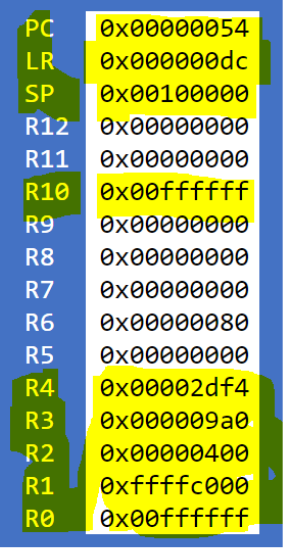

Chaque registre est semblable à un mot 32-bits individuel de la mémoire mais avec quelques différences:
- Les registres sont des petites mémoires bien plus rapides (environ 10 fois) que la mémoire principale.
- Les valeurs des registres peuvent être manipulées directement par les instructions. Pour manipuler une valeur située dans la mémoire principale, il faut avant toute chose la charger \[ *to load* \] dans un registre, puis la manipuler, puis (si la nouvelle valeur doit être préservée) la remettre \[ *to store* \] en mémoire principale (à la même adresse ou non)
- Les registres sont nommés, plutôt que d'avoir une adresse,
- ARMLite dispose de 13 **registres généraux**, nommés `R0` jusqu'à `R12`. Ils sont utilisés principalement pour détenir les données dont le programme a le plus fréquemment besoin. Pour un petit programme, il est possible que toutes les données nécessaires au bon fonctionnement du programme soient dans ces registres.
- Il y a aussi trois **registres spéciaux**, nommé `PC` pour *Program Counter* (compteur ordinal en français), `LR` et `SP` (nous en reparlerons plus tard). Ces registres sont manipulés automatiquement *par le processeur*. Il est néanmoins possible de les manipuler en assembleur bien qu'il y ait un risque d'interférer avec l'exécution normale du programme si on est pas suffisamment vigilent.

Dans le chapitre 2, nous apprendrons à nous servir des registres généraux.

## Le code machine est rapide

Lorsque vous avez fait tourner le programme en mode lent vous avez probablement remarquer que le programme «bouclait» très souvent sur les même instructions. Vous avez aussi pu remarquer qu'en mode lent, même en accélérant le plus possible, beaucoup d'instructions sont exécutées entre chaque rafraîchissement de la zone graphique. Vous pouvez voir le nombre total d'instructions exécutées depuis le démarrage du programme dans le champ **Count**.

#### Exercice complémentaire

En utilisant une démarche *stopwatch*, faites tourner le programme du jeu de la vie pendant exactement 10 secondes avant de mettre en pause, puis relever le nombre d'instructions exécutées durant ce temps. Diviser le par 10 pour obtenir une mesure approchée de la vitesse d'exécution de l'ARMlite en instructions par seconde lorsqu'il tourne dans votre navigateur...
____

En fonction de l'ordinateur que vous utilisez, l'ARMLite peut exécuter plusieurs millions d'instructions par seconde. Et c'est en fait extrémement lent si on compare à la vitesse réel d'un processeur; l'ARMLite est après tout une simulation. Sous le capot, il s'agit d'un programme Javascript qui interprète chaque instruction machine de votre programme en appel de fonction Javascript. Votre navigateur, à son tour, doit traduire le code Javascript en code machine pour le processeur effectif de votre ordinateur (qui pourrait bien être un processeur ARM, ou bien un processeur Intel avec un jeu d'instruction différent).

Si vous faisiez tourner le même code machine directement sur un processeur ARM alors le programme tournerait à plusieurs milliards \[ *billion* \] d'instructions par secondes - et la plupart des motifs «organiques» du jeu de la vie se stabiliseraient quasimément instantanément.

### Pourquoi apprendre la programmation en assembleur?

Dans les premiers jours de l'informatique, le code assembleur offrait une avancé considérable par rapport à l'écriture de code machine en hexadécimal voir en binaire... Mais pourquoi l'apprendre aujourd'hui, alors qu'il y a une multitude de langage haut niveau plus simple à maîtriser? (en mettant de côté que vous avez besoin d'avoir vu un peu d'assembleur parceque c'est au programme)

Si vous deviez poursuivre une carrière en informatique, il est tout à fait possible que vous finissiez par devoir écrire quelques programmes en assembleur, ou dans un langage de programmation bas niveau similaire à l'assembleur. Mais il est aussi tout à fait possible que toute votre carrière passe sans jamais plus voir une ligne d'assembleur à nouveau! Alors pourquoi?

L'argument le plus fort pour apprendre un peu d'assembleur est que cela vous donnera une bien meilleure compréhension de ce qu'il se passe au niveau du processeur lorsque votre langage de haut niveau s'exécute. Par exemple, si vous continuez jusqu'au chapitre 5 vous devriez comprendre pourquoi, dans un langage haut niveau, l'accès à un élément arbitraire d'un tableau se fait en temps constant et non dans un temps proportionnel à la taille de ce tableau. Pour prendre une analogie, il n'est pas nécessaire de savoir comment un moteur à combustion fonctionne pour conduire une voiture, mais la plupart des gens qui s'*intéressent* au voiture (les sportifs automobiles par exemple) ont une compréhension approfondie des mécanismes à l'oeuvre dans leur automobile afin, par exemple, d'en obtenir le meilleur.

Une dernière raison est qu'apprendre l'assembleur peut apporter beaucoup de plaisir et d'émerveillement. N'est-il pas impressionnant qu'un petit programme de 71 instructions dont chacune n'effectue qu'une opération très simple, puisse produire des comportements aussi complexes et intéressants que ceux du jeu de la vie? La plupart des exemples qu'on trouve en assembleur comme «trier trois nombres» sont ennuyeux, mais il est tout à fait possible d'écrire des programmes très intéressants, et si vous suivez ce livre jusqu'au bout, vous écrirez une série de programme, du plus simple jusqu'à des programmes d'une complexité satisfaisante: vous serez alors en mesure de lire et de comprendre exactement comment fonctionne le jeu de la vie.